In [1]:
import torch
import numpy as np
import meshzoo

from torchfem.elements import linear_to_quadratic
from torchfem import Planar
from torchfem.materials import IsotropicPlaneStress
from torchfem.io import import_mesh
from torchfem.examples import get_example_file

# Material model (plane stress)
material = IsotropicPlaneStress(E=1000.0, nu=0.3)

## A simple cantilever beam with first order quads

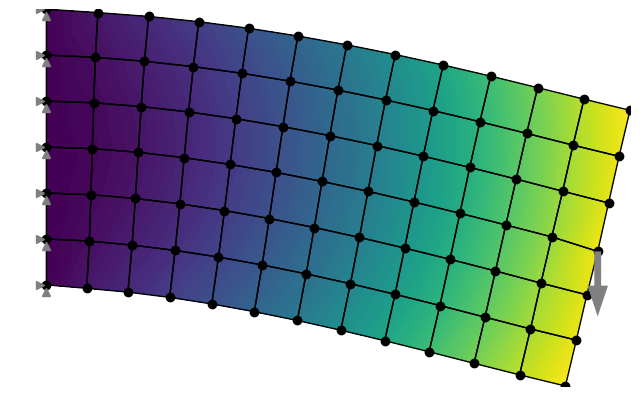

In [2]:
points, cells = meshzoo.rectangle_quad(
    np.linspace(0.0, 2.0, 13),
    np.linspace(0.0, 1.0, 7),
    cell_type="quad4",
)
nodes = torch.tensor(points, dtype=torch.get_default_dtype())
elements = torch.tensor(cells.tolist())

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
forces = torch.zeros_like(nodes)
forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
displacements = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[left, :] = True

# Thickness
thickness = 0.1 * torch.ones(len(elements))

# Create model
cantilever = Planar(
    nodes, elements, forces, displacements, constraints, thickness, material.C()
)

# Solve
u, f = cantilever.solve()

# Plot
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)

## A simple cantilever beam with second order quads

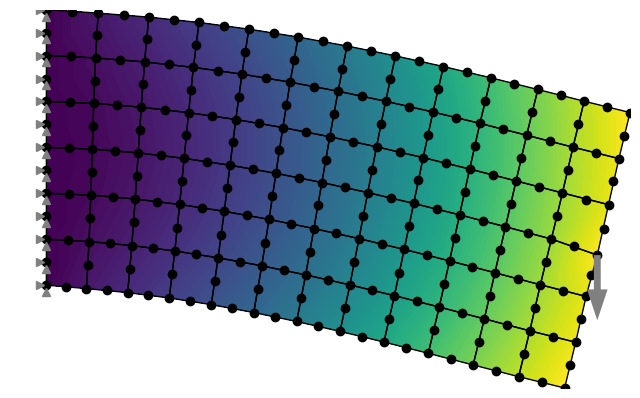

In [3]:
# Upgrade elements to quadratic
nodes, elements = linear_to_quadratic(nodes, elements)

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
forces = torch.zeros_like(nodes)
forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
displacements = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[left, :] = True

# Thickness
thickness = 0.1 * torch.ones(len(elements))

# Create model
cantilever = Planar(
    nodes, elements, forces, displacements, constraints, thickness, material.C()
)

# Solve
u, f = cantilever.solve()

# Plot
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)

## A simple cantilever beam with first order triangles 

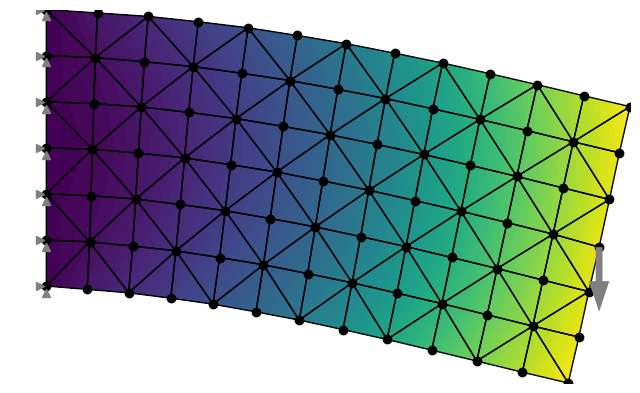

In [4]:
points, cells = meshzoo.rectangle_tri(
    np.linspace(0.0, 2.0, 13),
    np.linspace(0.0, 1.0, 7),
    variant="zigzag",
)
nodes = torch.tensor(points, dtype=torch.get_default_dtype())
elements = torch.tensor(cells.tolist())

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
forces = torch.zeros_like(nodes)
forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
displacements = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[left, :] = True

# Thickness
thickness = 0.1 * torch.ones(len(elements))

cantilever = Planar(
    nodes, elements, forces, displacements, constraints, thickness, material.C()
)
# Solve
u, f = cantilever.solve()
# Plot
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)

## A simple cantilever beam with second order triangles 

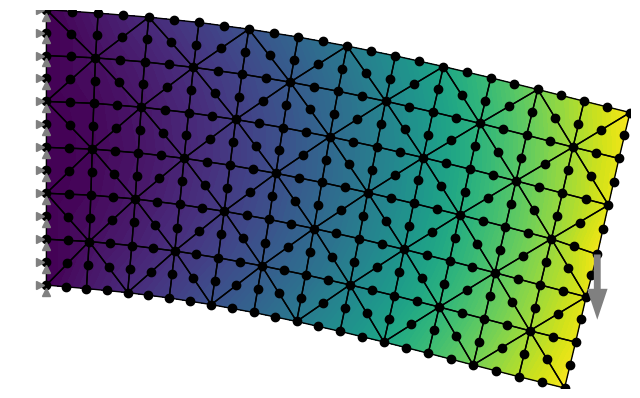

In [5]:
# Upgrade elements to quadratic
nodes, elements = linear_to_quadratic(nodes, elements)

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
forces = torch.zeros_like(nodes)
forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
displacements = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[left, :] = True

# Thickness
thickness = 0.1 * torch.ones(len(elements))

# Create model
cantilever = Planar(
    nodes, elements, forces, displacements, constraints, thickness, material.C()
)
# Solve
u, f = cantilever.solve()

# Plot
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)

## A simple fillet in 2D 

In [6]:
# Import mesh
specimen = import_mesh(get_example_file("fillet.vtu"), C=material.C())

# Symmetry nodes
left = specimen.nodes[:, 0] < 0.1
specimen.constraints[left, 0] = True
bottom = specimen.nodes[:, 1] < 0.1
specimen.constraints[bottom, 1] = True

# Load at right end
right = specimen.nodes[:, 0] >= specimen.nodes[:, 0].max() - 0.1
specimen.constraints[right, 0] = True
specimen.displacements[right, 0] = 6.0

In [7]:
u, f = specimen.solve()

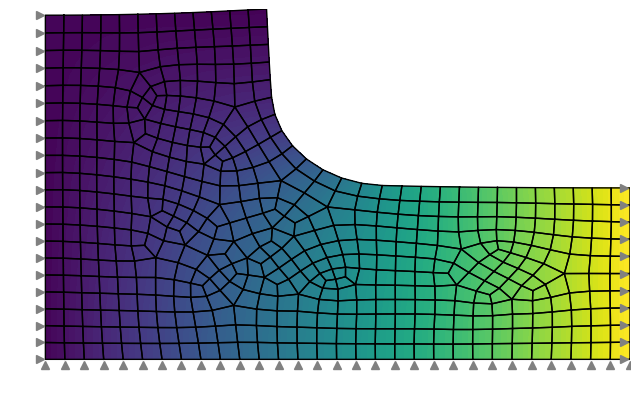

In [8]:
specimen.plot(u, node_property=u[:, 0], figsize=(8, 8))

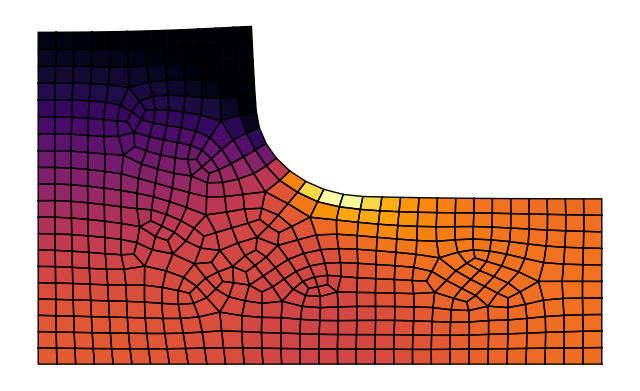

In [9]:
# Stress
mises = specimen.compute_stress(u, mises=True)
specimen.plot(u, bcs=False, element_property=mises, figsize=(8, 8), cmap="inferno")